<a href="https://colab.research.google.com/github/Jignacio14/7506R-1C2023-GRUPO09/blob/Pruebas/7506R_TP1_GRUPO9_CHP1_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pruebas

En este jupyter notebook vamos a explorar un conjunto de datos sobre reservas de hoteles y tratar de hallar un modelo que nos permita predecir si la reserva va a ser cancelada 

Importamos todas las librerias que vamos a usar

In [1]:
import pandas as pd 
import numpy as np
import sklearn as sk
import seaborn as sns
from matplotlib import pyplot as plt

Cargamos los datos en un dataframe de pandas. Creamos una copia del dataframe original y trabajamos encima de la copia

In [2]:
hotelsDfOriginal = pd.read_csv("./hotels_train.csv")
hotelsdf = hotelsDfOriginal.copy()

print("El data frame esta compuesto por "f"{hotelsdf.shape[0]}"" filas y "f"{hotelsdf.shape[1]}"" columnas")

El data frame esta compuesto por 61913 filas y 33 columnas


Un vistaso básico a la información contenida en el dataframe:

In [3]:
pd.concat([hotelsdf.head(2), hotelsdf.sample(5), hotelsdf.tail(2)])

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,NaN,0,Transient,115.50,0,1,Canceled,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,NaN,0,Transient,42.00,1,0,Check-Out,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
8299,City Hotel,86,2015,September,37,9,0,2,2,0.0,...,68.0,0,Transient-Party,100.00,0,0,Canceled,2015-09-08,a7a20d2f-da71-46be-b000-89c8d6b0f23b,1
56704,Resort Hotel,8,2016,October,41,6,1,3,2,0.0,...,405.0,0,Transient-Party,54.50,1,1,Check-Out,2016-10-10,e6996927-c886-45a5-a1de-db4466606c5e,0
8946,City Hotel,37,2015,November,45,1,2,1,2,0.0,...,NaN,0,Transient,60.00,0,0,Check-Out,2015-11-04,00188cf7-13d9-4fab-9102-d122281a6e97,0
55395,City Hotel,16,2015,October,42,15,1,3,2,0.0,...,NaN,0,Transient-Party,90.00,0,0,Check-Out,2015-10-19,8e31279f-6851-4dcd-9471-ace6911e35ec,0
44209,City Hotel,49,2016,March,13,23,0,1,2,0.0,...,NaN,0,Transient,110.00,1,0,Check-Out,2016-03-24,04158701-4ecf-477a-8cdd-c3485b06fbb6,0
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,NaN,0,Transient,36.05,0,0,Canceled,2015-07-08,01906859-1094-4e37-b13e-b015b594d159,1
61912,City Hotel,57,2016,April,17,17,2,5,2,0.0,...,NaN,0,Transient,143.29,0,0,Canceled,2016-04-09,7137e599-4442-41fb-b147-4aba9f344e38,1


Renombramos las columnas del dataframe con nombres mas claros y en español

In [4]:
nuevas_columnas = {'hotel':'hotel',
    'lead_time':'anticipacion_dias',
    'arrival_date_year':'llegada_anio',
    'arrival_date_month':'llegada_mes',
    'arrival_date_week_number':'llegada_numero_semana',
    'arrival_date_day_of_month':'llegada_dia_del_mes',
    'stays_in_weekend_nights':'cantidad_noches_finDeSemana',
    'stays_in_week_nights':'cantidad_noches_semana',
    'adults':'cantidad_adultos',
    'children':'cantidad_ninios', #En el paper, dice que children es un int. Pero figura como float64. #TODO: Investigar
    'company':'ID_compania',
    'days_in_waiting_list': 'cantidad_dias_listaEspera',
    'customer_type': 'tipo_cliente',
    'adr': 'promedio_gastos_diarios', #No me termina de cerrar este valor
    'required_car_parking_spaces': 'cantidad_estacionamientos_pedidos',
    'total_of_special_requests': 'cantidad_pedidos_especiales',
    'reservation_status': 'estado_reserva',
    'reservation_status_date': 'estado_reserva_fecha',
    'id': 'id',
    'is_canceled': 'esta_cancelado',}

#hotelsdf.rename(columns = nuevas_columnas, inplace = True)

In [5]:
#pd.concat([hotelsdf.head(2), hotelsdf.sample(5), hotelsdf.tail(2)])

Por otro lado, podemos observar que tipo de dato almacena cada columna y cuales tienen datos faltantes

In [6]:
hotelsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

Segun la clasificacion de las variables podemos establecer lo siguiente sobre los datos extraidos del dataframe

Variables cuantitativas, entre las cuales podemos encontrar:

- lead_time "time beetwen reservation and arrival"
- arrival_date_year
- arrival_date_week_number  
- arrival_date_day_of_month
- stays_in_weekend_nights
- days_in_waiting_list
- stays_in_week_nights
- adult
- children
- babies
- previous_cancellations
- previous_bookings_not_canceled
- booking_changes
- days_in_waiting_list
- adr "average day rate"
- required_car_parking_spaces
- total_of_special_requests
- reservation_status_date


Creamos una lista con todas las variables cuantitativas

<AxesSubplot: >

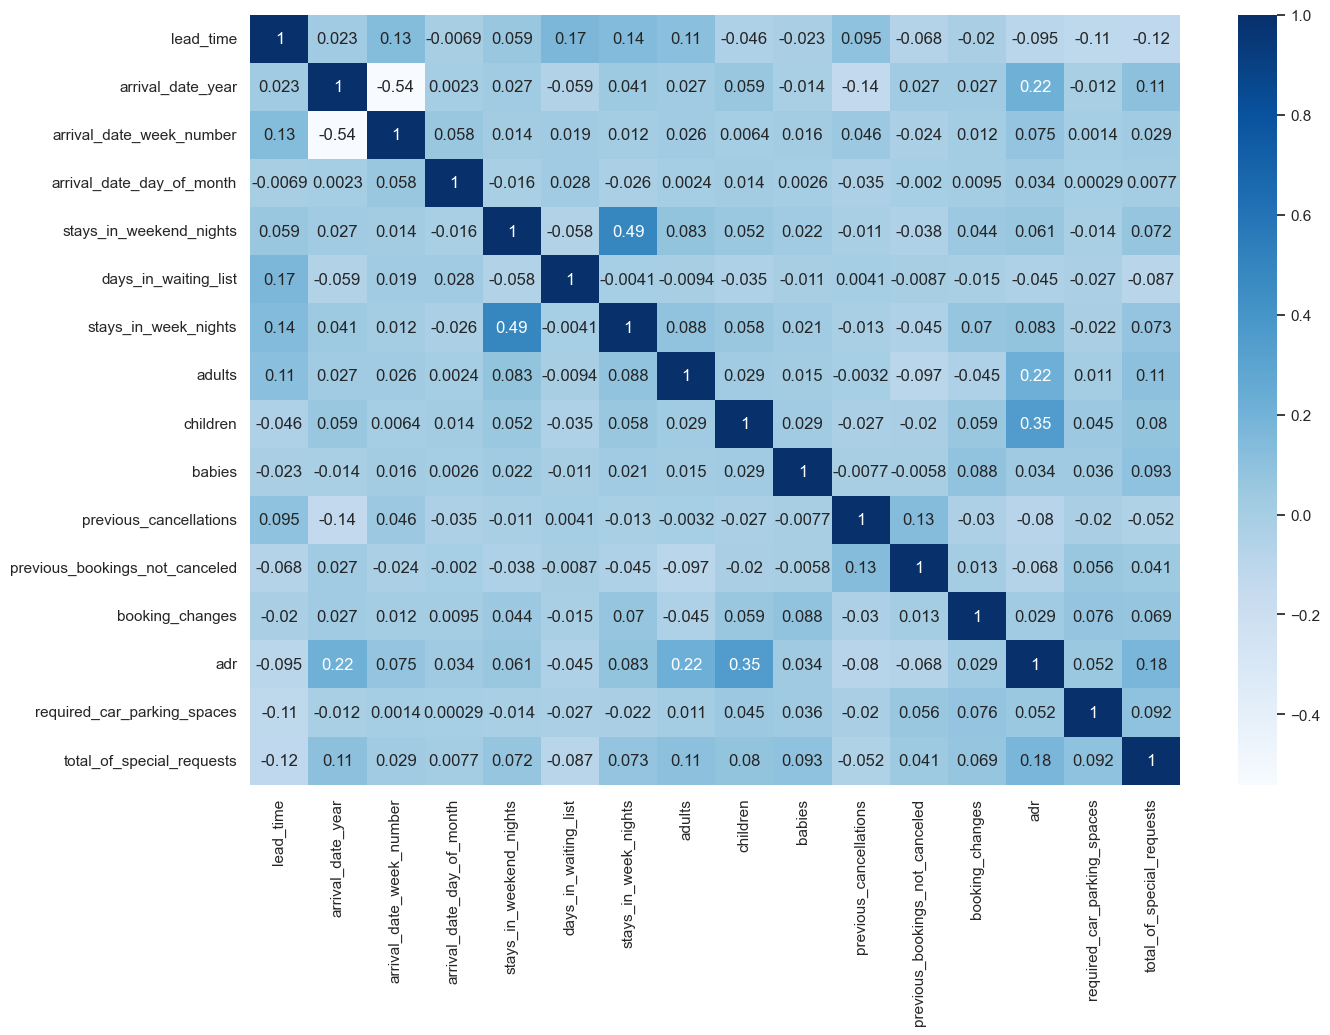

In [7]:
cuantitativas = ["lead_time"
,"arrival_date_year"
,"arrival_date_week_number"
,"arrival_date_day_of_month"
,"stays_in_weekend_nights"
,"days_in_waiting_list"
,"stays_in_week_nights"
,"adults"
,"children"
,"babies"
,"previous_cancellations"
,"previous_bookings_not_canceled"
,"booking_changes"
,"adr"
,"required_car_parking_spaces"
,"total_of_special_requests"
,"reservation_status_date"]

correlaciones = hotelsdf[cuantitativas].corr(numeric_only=True)

sns.set(style = 'darkgrid')
plt.figure( figsize = (15, 10))
sns.heatmap(data = correlaciones, annot = True, cmap = "Blues")

In [14]:
hotelsdf['arrival_date_month'].value_counts()

August       7176
July         6524
May          6159
April        5878
October      5863
June         5772
September    5619
March        4899
February     4125
December     3493
November     3404
January      3001
Name: arrival_date_month, dtype: int64

In [9]:
hotelsdf.isnull().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


Variables cualitativas

In [10]:
cualitativas = ['hotel',"arrival_date_month", 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']

#no tiene sentido imprimir cosas como id, company, deposite_type

for variable in cualitativas:
  print(hotelsdf[variable].value_counts().index.tolist())



['City Hotel', 'Resort Hotel']
['August', 'July', 'May', 'April', 'October', 'June', 'September', 'March', 'February', 'December', 'November', 'January']
['BB', 'HB', 'SC', 'Undefined', 'FB']
['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BRA', 'BEL', 'USA', 'NLD', 'CHE', 'CN', 'AUT', 'CHN', 'SWE', 'POL', 'RUS', 'ISR', 'NOR', 'ROU', 'AUS', 'AGO', 'DNK', 'FIN', 'LUX', 'MAR', 'TUR', 'HUN', 'ARG', 'JPN', 'KOR', 'CZE', 'IND', 'GRC', 'ZAF', 'HRV', 'MEX', 'COL', 'DZA', 'IRN', 'LTU', 'BGR', 'CHL', 'EST', 'UKR', 'SRB', 'SVK', 'ARE', 'NZL', 'SAU', 'THA', 'MOZ', 'SVN', 'CYP', 'LVA', 'PHL', 'ISL', 'IDN', 'TWN', 'HKG', 'SGP', 'EGY', 'TUN', 'NGA', 'URY', 'GEO', 'MYS', 'LBN', 'AZE', 'CPV', 'BLR', 'MAC', 'KWT', 'VEN', 'JOR', 'PAK', 'ECU', 'PER', 'QAT', 'DOM', 'GIB', 'KAZ', 'PRI', 'CRI', 'MDV', 'SEN', 'MLT', 'ALB', 'IRQ', 'MKD', 'BOL', 'AND', 'ARM', 'JEY', 'BIH', 'FRO', 'TZA', 'MUS', 'OMN', 'CUB', 'GNB', 'CIV', 'KEN', 'CMR', 'MNE', 'BEN', 'TJK', 'ETH', 'GAB', 'BGD', 'BHR', 'ZMB', 'SYR', 'GTM', 'KN